# Analyze Traffic Safety Data with Python

### Try some of these resources for extra help as you work:

* [View the Analyze Traffic Safety Data with Python cheatsheet](https://www.codecademy.com/learn/case-study-analyze-traffic-safety/modules/traffic-safety-case-study/cheatsheet)
* [View the solution notebook](./solution.html)
* [Learn more about analyzing traffic safety data in this introductory article](https://www.codecademy.com/courses/case-study-analyze-traffic-safety/articles/analyze-traffic-safety-data-with-python-article)

In [2]:
import pandas as pd
import datetime as dt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
# set plot theme and palette
sns.set_theme()
sns.set_palette('colorblind')

## Traffic data exploration

### 1. Inspect the traffic safety dataset

After running the first cell to load all necessary libraries, we need to load our dataset. Using pandas, load the dataset `traffic.csv` and save it as `traffic`. Inspect the first few rows.

In [2]:
# load dataset
## YOUR CODE HERE ##
import pandas as pd

traffic = pd.read_csv("traffic.csv")

# inspect first few rows
## YOUR CODE HERE ##
traffic.head(6)

,Date,Crashes_per_100k,Season
0,2006-01-01,169.176541,Winter
1,2006-02-01,154.028836,Winter
2,2006-03-01,159.930002,Spring
3,2006-04-01,155.741270,Spring
4,2006-05-01,168.179208,Spring
5,2006-06-01,158.890250,Summer


### 2. Inspect and format data types

The `traffic` data frame contains three columns: `Date`, `Crashes_per_100k`, and `Season`. In order to plot the `Crashes_per_100k` column as a time series, we need to make sure that the `Date` column is in date format. Inspect the data types in the data frame, convert the `Date` column to date format, and inspect the data types a second time.

In [3]:
# inspect data types
## YOUR CODE HERE ##
import pandas as pd

traffic = pd.read_csv("traffic.csv")

print(traffic.dtypes)

Date                 object
Crashes_per_100k    float64
Season               object
dtype: object


<details>
    <summary style="display:list-item; font-size:16px; color:blue;"><i>What did we discover in this step? Toggle to check!</i></summary>

The `traffic` dataframe consists of 3 columns and 180 rows. Luckily, there are no missing data to contend with. The number of crashes is normalized to the annual population per 100,000 people. We will also need to format the `Date` variable since Python does not yet recognize it as a datetime variable.


</details>

Convert the `Date` column to the date datatype using the `pd.to_datatime(column)` function.

In [4]:
# convert Date to date format
## YOUR CODE HERE ##
traffic["Date"] = pd.to_datetime(traffic["Date"])

# inspect data types
## YOUR CODE HERE ##
print(traffic.dtypes)

Date                datetime64[ns]
Crashes_per_100k           float64
Season                      object
dtype: object


<details>
    <summary style="display:list-item; font-size:16px; color:blue;"><i>What did we discover in this step? Toggle to check!</i></summary>

By using the `pd.to_datetime()` function, we converted a character string object to the `datetime64[ns]` datatype. This will allow us to plot a time series of data points.

</details>

### 3. Visualize traffic safety data
To get a sense of trends that may exist in the data, use seaborn's `sns.lineplot()` function to create a line plot of the `traffic` data with `Date` on the x-axis and `Crashes_per_100k` on the y-axis.

         Date  Crashes_per_100k  Season
0  2006-01-01        169.176541  Winter
1  2006-02-01        154.028836  Winter
2  2006-03-01        159.930002  Spring
3  2006-04-01        155.741270  Spring
4  2006-05-01        168.179208  Spring
Date                datetime64[ns]
Crashes_per_100k           float64
Season                      object
dtype: object


<AxesSubplot:xlabel='Date', ylabel='Crashes_per_100k'>

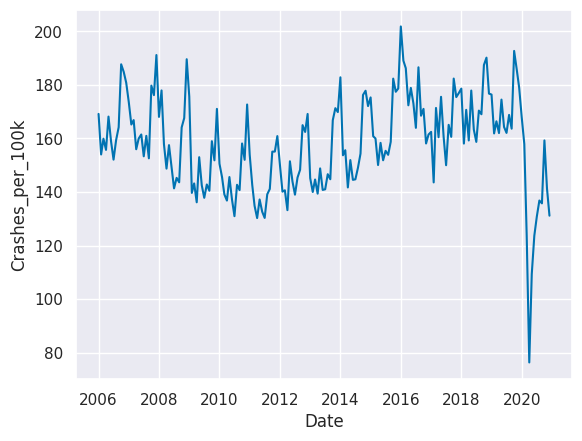

In [5]:
# create line plot
## YOUR CODE HERE ##
import pandas as pd
import seaborn as sns

traffic = pd.read_csv("traffic.csv")

print(traffic.head())

traffic["Date"] = pd.to_datetime(traffic["Date"])

print(traffic.dtypes)

sns.lineplot(x="Date", y="Crashes_per_100k", data=traffic)



<details>
    <summary style="display:list-item; font-size:16px; color:blue;"><i>What did we discover in this step? Toggle to check!</i></summary>

Looking at the line plot of our collision data, we can see the decreasing trend in crash rates from 2006 continuing until 2010 or 2011, and then crash rates begin increasing. The data for 2020 is very different from the preceding years.
    
There also appear to be cyclical patterns, which may indicate differing crash rates by season.

</details>

### 4. Visualize seasonal rates

Since we saw a fair amount of variance in the number of collisions occurring throughout the year, we might hypothesize that the number of collisions increases or decreases during different seasons. We can visually explore this with a box plot. 

Use `sns.boxplot()` with crash rate on the x-axis and season on the y-axis. Remove the anomolous 2020 data by adjusting the `data` parameter to `traffic[traffic.Date.dt.year != 2020]`.

         Date  Crashes_per_100k  Season
0  2006-01-01        169.176541  Winter
1  2006-02-01        154.028836  Winter
2  2006-03-01        159.930002  Spring
3  2006-04-01        155.741270  Spring
4  2006-05-01        168.179208  Spring
Date                datetime64[ns]
Crashes_per_100k           float64
Season                      object
dtype: object


<AxesSubplot:xlabel='Crashes_per_100k', ylabel='Season'>

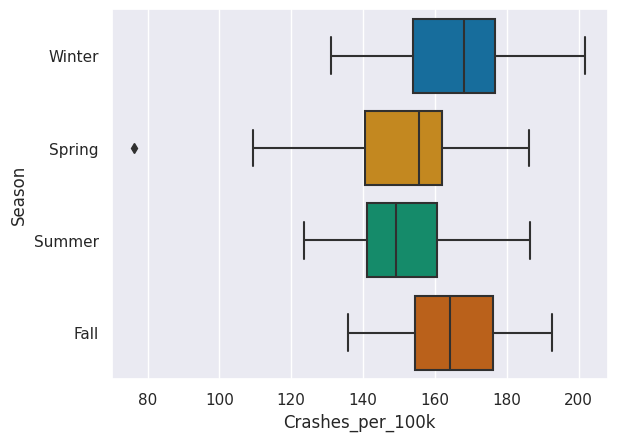

In [6]:
# create box plot by season
# sns.lineplot(x="Date", y="Crashes_per_100k", data=traffic)
# traffic = traffic[traffic.Date.dt.year !=2020]

## YOUR CODE HERE ##
import pandas as pd
import numpy as np
import seaborn as sns

traffic = pd.read_csv("traffic.csv")
print(traffic.head())

traffic["Date"] = pd.to_datetime(traffic["Date"])
print(traffic.dtypes)

# sns.boxplot(x="Crashes_per_100k", y="Season", data=traffic)
# sns.lineplot(x= "Date", y="Crashes_per_100k", data=traffic)
# sns.boxplot(x="Crashes_per_100k", y="Season", data=traffic)

traffic = traffic[traffic.Date.dt.year !=2000]

sns.boxplot(x="Crashes_per_100k", y="Season", data=traffic)


## Smartphone data exploration

### 5. Inspect the smartphone use dataset

The dataset `crashes_smartphones.csv` contains smartphone data from Pew Research Center matched to normalized crash rates from the `traffic` data frame for the years 2011 to 2019.

<details>
    <summary style="display:list-item;"><b>Toggle for an overview of the variables in this dataset.</b></summary>

* `Month_Year`: a shortened date with only the month and year of the survey
* `Crashes_per_100k`: the normalized crash rate matching the month and year of the smartphone usage survey
* `Season`: Winter, Spring, Summer, or Fall
* `Smartphone_Survey_Date`: the actual date the smartphone usage survey was conducted
* `Smartphone_usage`: the percent of survey participants that owned and used a smartphone

</details>

Load the dataset as `smartphones` and inspect the first few rows.

In [3]:
# import dataset
## YOUR CODE HERE ##
import pandas as pd
import seaborn as sns
import numpy as np

smartphones = pd.read_csv("crashes_smartphones.csv")

print(smartphones.head())

# inspect first few rows
## YOUR CODE HERE ##

  Month_Year  Crashes_per_100k  Season Smartphone_Survey_Date  \
0     Apr-12        133.213685  Spring                 4/3/12   
1     Apr-15        150.077792  Spring                4/12/15   
2     Apr-16        172.401948  Spring                 4/4/16   
3     Aug-12        145.403147  Summer                 8/5/12   
4     Dec-12        169.160811  Winter                12/9/12   

   Smartphone_usage  
0                46  
1                67  
2                72  
3                44  
4                45  


### 6. Format date data type
Similar to the  `traffic` data frame, the `smartphones` data frame has a date column that is not properly formatted. Convert the `Smartphone_Survey_Date` column to the date data type using the `pd.to_datetime()` function and then inspect the data types in the data frame.

In [4]:
# change to datetime object
## YOUR CODE HERE ##
import pandas as pd
import numpy as np
import seaborn as sns

smartphones = pd.read_csv("crashes_smartphones.csv")
print(smartphones.dtypes)

smartphones["Smartphone_Survey_Date"] = pd.to_datetime(smartphones["Smartphone_Survey_Date"])

print(smartphones.dtypes)

# inspect data types
## YOUR CODE HERE ##

Month_Year                 object
Crashes_per_100k          float64
Season                     object
Smartphone_Survey_Date     object
Smartphone_usage            int64
dtype: object
Month_Year                        object
Crashes_per_100k                 float64
Season                            object
Smartphone_Survey_Date    datetime64[ns]
Smartphone_usage                   int64
dtype: object


<details>
    <summary style="display:list-item; font-size:16px; color:blue;"><i>What did we discover in this step? Toggle to check!</i></summary>

There is a lot less data available for smartphone usage rates than there was for crash rates. The `smartphones` dataframe consists of 5 columns and 28 rows. Luckily, there are no missing data to contend with.


</details>

### 7. Visualize smartphone use data
Now let's take a look at smartphone use over time. Create a line plot of the `smartphones` data with `Smartphone_Survey_Date` on the x-axis and `Smartphone_usage` on the y-axis.

<AxesSubplot:xlabel='Smartphone_Survey_Date', ylabel='Smartphone_usage'>

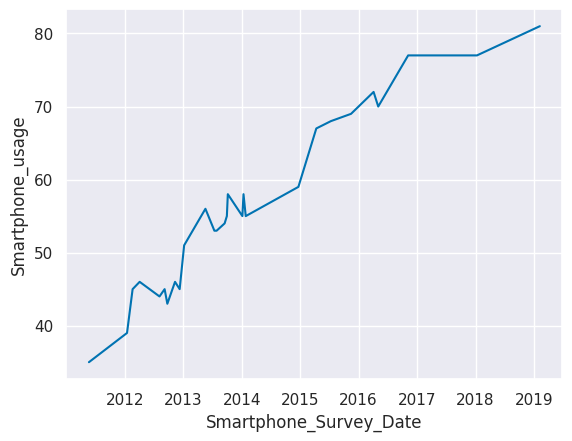

In [5]:
# create line plot
## YOUR CODE HERE ##
import pandas as pd
import numpy as np
import seaborn as sns

smartphones = pd.read_csv("crashes_smartphones.csv")
smartphones["Smartphone_Survey_Date"] = pd.to_datetime(smartphones["Smartphone_Survey_Date"])

sns.lineplot(x="Smartphone_Survey_Date", y="Smartphone_usage", data=smartphones)

<details>
    <summary style="display:list-item; font-size:16px; color:blue;"><i>What did we discover in this step? Toggle to check!</i></summary>

We can see a trend of smartphone usage increasing over time.

</details>

## Relationship exploration

### 8. Visualize crash rate by smartphone use
A scatter plot with smartphone usage on one axis and crash rates on the other axis will give us an idea of whether there is a relationship between these two variables. 

Create a scatter plot with a regression line using seaborn's `sns.regplot()` with `Smartphone_usage` on the x-axis and `Crashes_per_100k` on the y-axis.

<AxesSubplot:xlabel='Smartphone_usage', ylabel='Crashes_per_100k'>

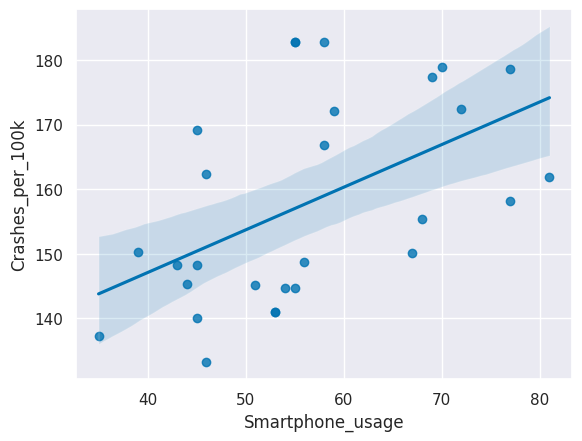

In [6]:
# create scatter plot with regression line
## YOUR CODE HERE ##
import pandas as pd
import numpy as np
import seaborn as sns
traffic = pd.read_csv("traffic.csv")
traffic["Date"] = pd.to_datetime(traffic["Date"])

smartphones = pd.read_csv("crashes_smartphones.csv")
smartphones["Smartphone_Survey_Date"] = pd.to_datetime(smartphones["Smartphone_Survey_Date"])

sns.regplot(x="Smartphone_usage", y="Crashes_per_100k", data=smartphones)


<details>
    <summary style="display:list-item; font-size:16px; color:blue;"><i>What did we discover in this step? Toggle to check!</i></summary>

There appears to be a positive linear relationship between the rate of car crashes and the rate of adult smartphone usage in the U.S.

</details>

### 9. Check the correlation coefficient

To test whether the correlation between `Smartphone_usage` and `Crashes_per_100k` is statistically significant, we can calculate the Pearson's _r_ correlation coefficient and the associated _p_-value. 

Use `corr, p = pearsonr(column1, column2)` on the `Smartphone_usage` and `Crashes_per_100k` columns in the `smartphones` dataframe. Then use the provided code to print `corr` and `p` to see the results.

In [7]:
# find Pearson's r and p-value
# corr, p = ## YOUR CODE HERE ##

import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

traffic = pd.read_csv("traffic.csv")
traffic["Date"] = pd.to_datetime(traffic["Date"])

smartphones = pd.read_csv("crashes_smartphones.csv")

smartphones["Smartphone_Survey_Date"] = pd.to_datetime(smartphones["Smartphone_Survey_Date"])
print(smartphones.head(10))

column1 = smartphones["Smartphone_usage"]
column2 = smartphones["Crashes_per_100k"]

corr, p = pearsonr(column1, column2)

r = column1.corr(column2)



# print corr and p
print("Pearson's r =",  round(corr,3))
print("p = ", round(p,3))

  Month_Year  Crashes_per_100k  Season Smartphone_Survey_Date  \
0     Apr-12        133.213685  Spring             2012-04-03   
1     Apr-15        150.077792  Spring             2015-04-12   
2     Apr-16        172.401948  Spring             2016-04-04   
3     Aug-12        145.403147  Summer             2012-08-05   
4     Dec-12        169.160811  Winter             2012-12-09   
5     Dec-14        172.106950  Winter             2014-12-21   
6     Feb-12        140.132304  Winter             2012-02-19   
7     Feb-19        161.886540  Winter             2019-02-07   
8     Jan-12        150.248029  Winter             2012-01-15   
9     Jan-13        145.193026  Winter             2013-01-06   

   Smartphone_usage  
0                46  
1                67  
2                72  
3                44  
4                45  
5                59  
6                45  
7                81  
8                39  
9                51  
Pearson's r = 0.513
p =  0.005


<details>
    <summary style="display:list-item; font-size:16px; color:blue;"><i>What did we discover in this step? Toggle to check!</i></summary>

The Pearson's r correlation coefficient is greater than 0.5, which indicates a moderately strong positive relationship. The p-value is less than 0.05. Together, this tells us that there is a statistically significant correlation between adult smartphone usage rates and car crash rates in the U.S. We have to be careful though: correlation does not mean causation, as the saying goes. Many other factors may be contributing to the rise in car crash rates from 2011 to 2019. 

</details>

## Analysis

### 10. Run a linear regression
We can use a linear regression to predict crash rates based on smart phone usage. Let's regress crash rates on smartphone usage. Then we can predict the crash rate in 2020 and see if it matches the actual crash rate in 2020!

We have provided the code to convert the variables to NumPy arrays that will work with the modeling function. The `Smartphone_usage` array is saved as `X`, and the `Crashes_per_100k` array is saved as `y`.

Initiate the model by saving `LinearRegression()` to the variable `lm`. Then fit the model and run the regression with `.fit()`.

In [9]:
# convert columns to arrays
x = smartphones['Smartphone_usage'].to_numpy().reshape(-1, 1)
y = smartphones['Crashes_per_100k'].to_numpy().reshape(-1, 1)
# print(x)
# print(y)

In [11]:
# initiate the linear regression model
from sklearn.linear_model import LinearRegression
## YOUR CODE HERE ##
lm = LinearRegression()

x = smartphones['Smartphone_usage'].to_numpy().reshape(-1, 1)
y = smartphones['Crashes_per_100k'].to_numpy().reshape(-1, 1)
# fit the model
## YOUR CODE HERE ##
lm.fit(x,y)

LinearRegression()

### 11. Print and interpret regression coefficients

Let's see the values our model produced. Print the coefficients from our `lm` model. Then think about which parts of the regression line equation these values represent.

In [12]:
# print the coefficients 
## YOUR CODE HERE ##
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import numpy as np

lm = LinearRegression()

x = smartphones['Smartphone_usage'].to_numpy().reshape(-1, 1)
y = smartphones['Crashes_per_100k'].to_numpy().reshape(-1, 1)

lm.fit(x,y)

coef = lm.coef_[0]
intercept = lm.intercept_

print(f"The co-efficient is= {coef}")
print(f"The intercept is= {intercept}")

The co-efficient is= [0.66103316]
The intercept is= [120.6637106]


<details>
    <summary style="display:list-item; font-size:16px; color:blue;"><i>What did we discover in this step? Toggle to check!</i></summary>

The generic equation for a line is `y = b + (m * x)`, where `b` is the value where the the line intercepts the y-axis and `m` is the slope of the line. In this step, we learned the two coefficients of our linear model, `b = 120.6637` and `m = 0.6610`. So the equation for our linear model is `y = 120.6637 + (0.6610 * x)` and we can use this equation to predict new values of y from any new value of x.
    
We can also interpret the slope of 0.6610: every additional percentage point of smartphone usage is associated with an additional 0.6610 crashes per 100,000 people.
</details>

### 12. Make a prediction

Let's assume smartphone usage was the same for 2020 as it was for 2019. This is a reasonable asssumption since the increase in smartphone usage that we observed in our plot started to plateau at the end of the time series. Let's use this approximation and our regression model to predict the crash rate in 2020.

From our model output, the regression line equation is `Crashes_per_100k = 120.6637 + (0.6610 * Smartphone_usage)`. Run the provided code to view the smartphone usage rate for 2019. Then substitute this value into the equation, using Python as a calculator to predict the crash rate for 2020.

In [13]:
# get the smartphone usage rate from 2019
# smartphones_2019 = smartphones[smartphones['Month_Year'] == "Feb-19"]
smartphones_2019 = smartphones[smartphones["Smartphone_Survey_Date"].dt.year == 2019]

smartphone_usage_2019 = smartphones_2019

print(smartphone_usage_2019)

  Month_Year  Crashes_per_100k  Season Smartphone_Survey_Date  \
7     Feb-19         161.88654  Winter             2019-02-07   

   Smartphone_usage  
7                81  


In [14]:
# predict the crash rate in 2020 using the regression equation
## YOUR CODE HERE ##
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import numpy as np

traffic = pd.read_csv("traffic.csv")
traffic["Date"] = pd.to_datetime(traffic["Date"])

smartphones = pd.read_csv("crashes_smartphones.csv")

smartphones["Smartphone_Survey_Date"] = pd.to_datetime(smartphones["Smartphone_Survey_Date"])

lm = LinearRegression()

x = smartphones['Smartphone_usage'].to_numpy().reshape(-1, 1)
y = smartphones['Crashes_per_100k'].to_numpy().reshape(-1, 1)

lm.fit(x,y)

coef = lm.coef_[0]
intercept = lm.intercept_

print(f"The co-efficient is= {coef}")
print(f"The intercept is= {intercept}")

# model_predict = lm.predict(smartphones[smartphones["Smartphone_Survey_Date"].dt.year == 2020])

predict_new = smartphones[smartphones["Smartphone_Survey_Date"].dt.year == 2019]

print(predict_new)

x_new = predict_new["Smartphone_usage"].to_numpy().reshape(-1,1)

# print(x_new[0])

lm_predict_2020 = lm.predict(x_new)

print(f"The Crash rate is= {np.round(lm_predict_2020,3)[0]}")

The co-efficient is= [0.66103316]
The intercept is= [120.6637106]
  Month_Year  Crashes_per_100k  Season Smartphone_Survey_Date  \
7     Feb-19         161.88654  Winter             2019-02-07   

   Smartphone_usage  
7                81  
The Crash rate is= [174.207]


<details>
    <summary style="display:list-item; font-size:16px; color:blue;"><i>What did we discover in this step? Toggle to check!</i></summary>

If the smartphone usage rate was the same in 2020 as in 2019 (81%), our model predicts that the crash rate in 2020 would be 174.205 crashes per 100,000 people.  

</details>

### 13. Compare to the actual rate

How good was our prediction? Get the actual crash rate for February of 2020 from the `traffic` dataframe using `pd.to_datetime("2020-02-01")` as the value for `Date`.

In [15]:
# get the actual crash rate in Feb 2020
## YOUR CODE HERE ##
import pandas as pd
import numpy as np
import seaborn as sns

traffic = pd.read_csv("traffic.csv")
# print(traffic.head())

traffic["Date"] = pd.to_datetime(traffic["Date"])

traffic_2020 = traffic[(traffic["Date"].dt.year == 2020) & (traffic["Date"].dt.month == 2)]

print(traffic_2020)

# crash_rate_2020 = traffic_2020["Crashes_per_100k"]

# print(crash_rate_2020)



          Date  Crashes_per_100k  Season
169 2020-02-01         157.88955  Winter


<details>
    <summary style="display:list-item; font-size:16px; color:blue;"><i>What did we discover in this step? Toggle to check!</i></summary>

The actual crash rate in Februrary of 2020 was only 157.8895, which was a fair bit lower than our prediction. 

</details>

### 14. Visualize the prediction

Let's plot our regression plot again, but let's add two new points on top:

* The predicted 2020 crash rate
* The actual 2020 crash rate

Code has been provided for the original regression plot and a legend title. 

Add a scatter plot layer to add the 2020 predicted and actual crash rates that both used the 2019 smartphone usage rate. Use different colors and marker shapes for the predicted and actual 2020 crash rates.

          Date  Crashes_per_100k  Season
169 2020-02-01         157.88955  Winter
  Month_Year  Crashes_per_100k  Season Smartphone_Survey_Date  \
7     Feb-19         161.88654  Winter             2019-02-07   

   Smartphone_usage  
7                81  
[[81]]
[[157.88955027]]
[[174.20739643]]


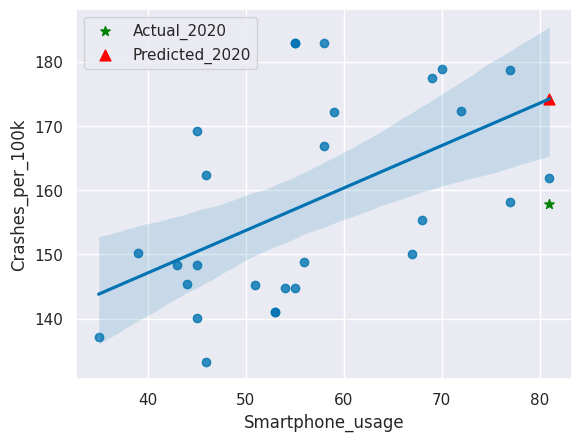

In [16]:
# recreate the regression plot we made earlier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression


traffic = pd.read_csv("traffic.csv")
# print(traffic.head())

traffic["Date"] = pd.to_datetime(traffic["Date"])


smartphones = pd.read_csv("crashes_smartphones.csv")

smartphones["Smartphone_Survey_Date"] = pd.to_datetime(smartphones["Smartphone_Survey_Date"])

sns.regplot(x = "Smartphone_usage", y = "Crashes_per_100k", data = smartphones)


# add a scatter plot layer to show the actual and predicted 2020 values
## YOUR CODE HERE ##
traffic_2020 = traffic[(traffic["Date"].dt.year == 2020) & (traffic["Date"].dt.month == 2)]
print(traffic_2020)

Assumed_smartphones_2020 = smartphones[(smartphones["Smartphone_Survey_Date"].dt.year == 2019) & (smartphones["Smartphone_Survey_Date"].dt.month == 2)]

print(Assumed_smartphones_2020)

actual_x = Assumed_smartphones_2020["Smartphone_usage"].to_numpy().reshape(-1,1)
actual_y = traffic_2020["Crashes_per_100k"].to_numpy().reshape(-1,1)

print(actual_x)
print(actual_y)

lm = LinearRegression()

x = smartphones['Smartphone_usage'].to_numpy().reshape(-1, 1)
y = smartphones['Crashes_per_100k'].to_numpy().reshape(-1, 1)

lm.fit(x,y)

coef = lm.coef_[0]
intercept = lm.intercept_

predicted_y = lm.predict(actual_x)

print(predicted_y)

plt.scatter(actual_x, actual_y, s=50, color = "green", marker= "*", label="Actual_2020")
plt.scatter(actual_x, predicted_y, s=60, color= "red", marker= "^", label= "Predicted_2020")


# add legend title
plt.legend()
plt.show()

In [ ]:
<details>
    <summary style="display:list-item; font-size:16px; color:blue;"><i>What did we discover in this step? Toggle to check!</i></summary>

By adding another layer to our regression plot, we can see the difference between the predicted and real crash rates in February 2020. This allows us to see how these values compare to the rest of the dataset. 

</details>